<a href="https://colab.research.google.com/github/shelbon/quantum-esgi/blob/main/TP3_quantum_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probleme
Bob est victime d'un mauvais sort. Vous savez que le rituel pour lever cette malédiction est consigné dans un grimoire qui se trouve dans une bibliothèque quantique. Le problème est que dans une bibliothèque quantique, l'emprunt se fait toujours au hasard.La section de la bibliotheque contient  4 livres
dont un est le bon et les autres contienne des malédiction

# Solution
Utiliser l'algorithme de groover et l'interférence pour maximiser les chances
d'emprunter le bon grimoire

In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=dbcb526370a2796c0c6008545480fb7e03865348dd639e8e2a42b629c53021e3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

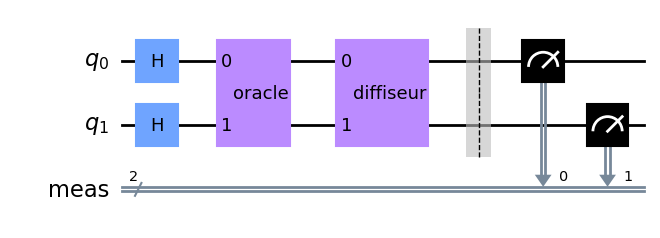

In [133]:
import numpy as np
from qiskit import *
from qiskit.algorithms import AmplificationProblem
#initialisation du circuit
#le qubit 0 et 1  correspont a tout les livres possible
circuit=QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
# define Grover's algorithm qui permettra de trovuve le bon livre
oracle=QuantumCircuit(2,name="oracle")
oracle.x(0)
oracle.cz(0,1)
oracle.x(0)
oracle.to_gate()

# diffuseur
# modifie l'amplitude des probabilité de chaque  possibilité
# les possibilité négative s'annule et les positive s'aditionne
# faisant resortir l'element recherché
diffiseur=QuantumCircuit(2,name="diffiseur")
diffiseur.h([0,1])
diffiseur.z([0,1])
diffiseur.cz(0,1)
diffiseur.h([0,1])
diffiseur.to_gate()
#
circuit.append(oracle,[0,1])
circuit.append(diffiseur,[0,1])

circuit.measure_all()
circuit.draw("mpl")

In [131]:
 # supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result_sim = job.result()


{'10': 10000}


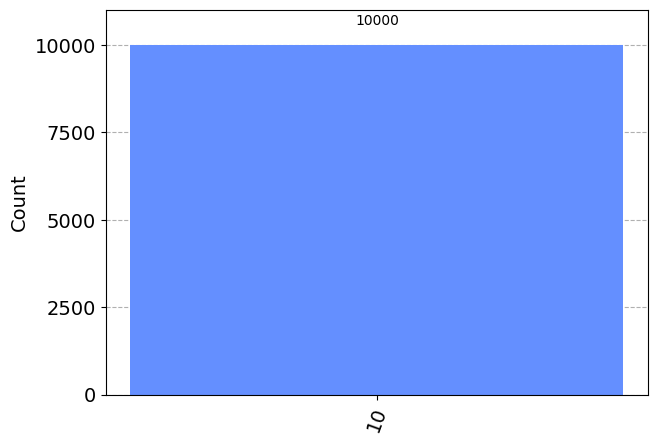

In [132]:
#vecteur d'etat
counts = result_sim.get_counts(compiled_circuit)
print(counts)

from qiskit.visualization import plot_histogram

plot_histogram(counts)
#Le resultat est le livre recherché